# Visualization Techniques

## Venustiano Soancatl Aguilar
### Center for Information Technology
### University of Groningen, the Netherlands

### Some visualization techniques
- Box plots
- Parallel coordinates
- Scatter plots
- Heatmaps

### Box plots
The main goal is to visualize distribution of the data.
Box plots show:
- Median
- Quartiles 25% above and below the median
- Whiskers
- Outliers

### Defining a template

In [1]:
# https://github.com/plotly/plotly.py/issues/1664#issuecomment-511773518
import plotly.graph_objects as go
import plotly.io as pio

# Set default renderer
pio.renderers.default = 'notebook+jupyterlab'  #  See [1]
# Set default template
pio.templates['slides'] = go.layout.Template(layout=dict(width=800, height=600))
pio.templates.default = 'plotly+slides'  # See [2]

### Loading the data

In [2]:
import pandas as pd
# Data
tableRes = pd.read_csv('data/results.txt',sep=' ')
# Long format
longTable = pd.melt(tableRes, id_vars=['iSubj','trial','Age','Decade'], var_name='myVars')
longTable.head()

iSubj  trial  Age  Decade     myVars     value
0      1      1   76       7  medLrms51  0.189493
1      1      2   76       7  medLrms51  0.204152
2      1      3   76       7  medLrms51  0.217347
3      1      4   76       7  medLrms51  0.169569
4      1      5   76       7  medLrms51  0.170786

In [3]:
longTable.groupby('myVars').transform(lambda value:(value - value.mean()) / value.std())['value']

0      -0.406276
1      -0.168225
2       0.046049
3      -0.729817
4      -0.710069
          ...   
4395   -1.090094
4396   -2.066097
4397   -1.074982
4398   -1.204796
4399   -0.402274
Name: value, Length: 4400, dtype: float64

In [4]:
# Normalizing the data
longTable["normVal"]=longTable.groupby('myVars'). \
                        transform(lambda value:(value - value.mean()) / value.std())["value"]
longTable.head() 

iSubj  trial  Age  Decade     myVars     value   normVal
0      1      1   76       7  medLrms51  0.189493 -0.406276
1      1      2   76       7  medLrms51  0.204152 -0.168225
2      1      3   76       7  medLrms51  0.217347  0.046049
3      1      4   76       7  medLrms51  0.169569 -0.729817
4      1      5   76       7  medLrms51  0.170786 -0.710069

### Visualizing differences between older and younger for each variable
- We will use boxplots for each variable and category
- `older >= 60`
- `younger < 60`

In [5]:
# Identifying older and younger, creating a new variable `old`
longTable["Old"] = longTable["Age"] > 60
longTable.head()

iSubj  trial  Age  Decade     myVars     value   normVal   Old
0      1      1   76       7  medLrms51  0.189493 -0.406276  True
1      1      2   76       7  medLrms51  0.204152 -0.168225  True
2      1      3   76       7  medLrms51  0.217347  0.046049  True
3      1      4   76       7  medLrms51  0.169569 -0.729817  True
4      1      5   76       7  medLrms51  0.170786 -0.710069  True

### Using an out of the box solution


In [6]:
import plotly.express as px
fig = px.box(longTable, y="normVal", x="myVars", color="Old", width=800, 
             height=400, hover_data=longTable.columns)
#fig.layout.autosize = False; fig.layout.width = 1000; fig.layout.height = 600
fig.show() 

### Excercise: prepare the previous plot for publication

### Excercise:  use boxplots instead of bars (means) in assignment 01 

# Parallel coordinates

# Plotly, out of the box solution
Look at the following site and investigate the format of the data

https://plotly.com/python/parallel-coordinates-plot/

In [7]:
px.data.iris().head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

Looking at the data, we need a table in wide format

### Reshaping the data
Look a the current structure of the table

In [8]:
longTable

iSubj  trial  Age  Decade     myVars     value   normVal    Old
0         1      1   76       7  medLrms51  0.189493 -0.406276   True
1         1      2   76       7  medLrms51  0.204152 -0.168225   True
2         1      3   76       7  medLrms51  0.217347  0.046049   True
3         1      4   76       7  medLrms51  0.169569 -0.729817   True
4         1      5   76       7  medLrms51  0.170786 -0.710069   True
...     ...    ...  ...     ...        ...       ...       ...    ...
4395     40      6   58       5  medLsdD51  0.079016 -1.090094  False
4396     40      7   58       5  medLsdD51  0.050360 -2.066097  False
4397     40      8   58       5  medLsdD51  0.079460 -1.074982  False
4398     40      9   58       5  medLsdD51  0.075648 -1.204796  False
4399     40     10   58       5  medLsdD51  0.099211 -0.402274  False

[4400 rows x 8 columns]

We will drop the `value` column and create variables in `myVars` as new columns

### Dropping the `value` column

In [9]:
wideTable = longTable.drop(['value'],axis=1)
wideTable

iSubj  trial  Age  Decade     myVars   normVal    Old
0         1      1   76       7  medLrms51 -0.406276   True
1         1      2   76       7  medLrms51 -0.168225   True
2         1      3   76       7  medLrms51  0.046049   True
3         1      4   76       7  medLrms51 -0.729817   True
4         1      5   76       7  medLrms51 -0.710069   True
...     ...    ...  ...     ...        ...       ...    ...
4395     40      6   58       5  medLsdD51 -1.090094  False
4396     40      7   58       5  medLsdD51 -2.066097  False
4397     40      8   58       5  medLsdD51 -1.074982  False
4398     40      9   58       5  medLsdD51 -1.204796  False
4399     40     10   58       5  medLsdD51 -0.402274  False

[4400 rows x 7 columns]

# Converting from long to wide format `pivot_table`


In [10]:
# https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
wideTable=wideTable.pivot_table(index=['iSubj','trial','Age','Decade','Old'], 
                                columns='myVars', values='normVal')
wideTable
# There is something strange

myVars                           meanK      medK  medLcov51  medLcovD51  \
iSubj trial Age Decade Old                                                
1     1     76  7      True   0.024586 -0.053610  -0.178508    0.332978   
      2     76  7      True  -0.226344  0.228271  -0.544866   -0.389216   
      3     76  7      True  -1.055870 -1.352643   1.353981    0.215643   
      4     76  7      True  -0.748506 -0.886268   1.700509    0.202514   
      5     76  7      True  -0.560256 -1.254999   1.347267    0.358471   
...                                ...       ...        ...         ...   
40    6     58  5      False  1.076750  0.955203  -1.102122   -1.175201   
      7     58  5      False  1.837141  1.357231  -1.267848   -1.434162   
      8     58  5      False  1.579807  1.481519  -1.108473   -1.120321   
      9     58  5      False  1.062452  0.821277  -1.135941   -1.191309   
      10    58  5      False  0.617156  0.271116  -0.977967   -0.958482   

myVars                        medLrms51  medLrmslD51  medLsd51  medLsdD51  \
iSubj trial Age Decade Old                                                  
1     1     76  7      True   -0.406276     0.045147 -0.194534   0.614619   
      2     76  7      True   -0.168225     0.054335 -0.465559  -0.174366   
      3     76  7      True    0.046049    -0.998491  1.551026   0.779784   
      4     76  7      True   -0.729817    -1.645271  1.006211  -0.081213   
      5     76  7      True   -0.710069    -1.297759  0.861507   0.292489   
...                                 ...          ...       ...        ...   
40    6     58  5      False   1.468353     2.267786 -0.899767  -1.090094   
      7     58  5      False   1.365997     3.023135 -1.181429  -2.066097   
      8     58  5      False   1.307570     2.709477 -0.927597  -1.074982   
      9     58  5      False   1.555134     2.410816 -0.946214  -1.204796   
      10    58  5      False   1.669779     2.284577 -0.693999  -0.402274   

myVars                        medSpeed   medTI51  medTIms51  
iSubj trial Age Decade Old                                   
1     1     76  7      True  -0.206204 -1.179195   0.095150  
      2     76  7      True   0.155747 -0.344193  -0.062731  
      3     76  7      True   0.962942  0.343531  -1.409570  
      4     76  7      True   1.035904  2.160290  -1.897633  
      5     76  7      True   0.565108  0.216632  -1.214724  
...                                ...       ...        ...  
40    6     58  5      False -1.052715 -0.204683   1.032779  
      7     58  5      False -1.725497  0.126370   1.873299  
      8     58  5      False -1.315347 -0.207280   1.482941  
      9     58  5      False -1.126462 -0.241420   1.203738  
      10    58  5      False -1.008167  0.079243   1.099630  

[400 rows x 11 columns]

### Reset the index

In [11]:
wideTable = wideTable.reset_index()
wideTable

myVars  iSubj  trial  Age  Decade    Old     meanK      medK  medLcov51  \
0           1      1   76       7   True  0.024586 -0.053610  -0.178508   
1           1      2   76       7   True -0.226344  0.228271  -0.544866   
2           1      3   76       7   True -1.055870 -1.352643   1.353981   
3           1      4   76       7   True -0.748506 -0.886268   1.700509   
4           1      5   76       7   True -0.560256 -1.254999   1.347267   
..        ...    ...  ...     ...    ...       ...       ...        ...   
395        40      6   58       5  False  1.076750  0.955203  -1.102122   
396        40      7   58       5  False  1.837141  1.357231  -1.267848   
397        40      8   58       5  False  1.579807  1.481519  -1.108473   
398        40      9   58       5  False  1.062452  0.821277  -1.135941   
399        40     10   58       5  False  0.617156  0.271116  -0.977967   

myVars  medLcovD51  medLrms51  medLrmslD51  medLsd51  medLsdD51  medSpeed  \
0         0.332978  -0.406276     0.045147 -0.194534   0.614619 -0.206204   
1        -0.389216  -0.168225     0.054335 -0.465559  -0.174366  0.155747   
2         0.215643   0.046049    -0.998491  1.551026   0.779784  0.962942   
3         0.202514  -0.729817    -1.645271  1.006211  -0.081213  1.035904   
4         0.358471  -0.710069    -1.297759  0.861507   0.292489  0.565108   
..             ...        ...          ...       ...        ...       ...   
395      -1.175201   1.468353     2.267786 -0.899767  -1.090094 -1.052715   
396      -1.434162   1.365997     3.023135 -1.181429  -2.066097 -1.725497   
397      -1.120321   1.307570     2.709477 -0.927597  -1.074982 -1.315347   
398      -1.191309   1.555134     2.410816 -0.946214  -1.204796 -1.126462   
399      -0.958482   1.669779     2.284577 -0.693999  -0.402274 -1.008167   

myVars   medTI51  medTIms51  
0      -1.179195   0.095150  
1      -0.344193  -0.062731  
2       0.343531  -1.409570  
3       2.160290  -1.897633  
4       0.216632  -1.214724  
..           ...        ...  
395    -0.204683   1.032779  
396     0.126370   1.873299  
397    -0.207280   1.482941  
398    -0.241420   1.203738  
399     0.079243   1.099630  

[400 rows x 16 columns]

###  Parallel coordinates (standard solution)


In [12]:
fig = px.parallel_coordinates(wideTable)
fig.show()

We need to see differences between older and younger

#### Using the `Old` variable as color to differentiate older and younger

In [13]:
#wideTable[wideTable.columns[4:]]
#wideTable["Old"]
# It seems that px.parallel_coordinates() do not accept True/False values for color
wideTable.loc[wideTable['Old'] == True, 'old'] = 1
wideTable.loc[wideTable['Old'] == False, 'old'] = 0
wideTable

myVars  iSubj  trial  Age  Decade    Old     meanK      medK  medLcov51  \
0           1      1   76       7   True  0.024586 -0.053610  -0.178508   
1           1      2   76       7   True -0.226344  0.228271  -0.544866   
2           1      3   76       7   True -1.055870 -1.352643   1.353981   
3           1      4   76       7   True -0.748506 -0.886268   1.700509   
4           1      5   76       7   True -0.560256 -1.254999   1.347267   
..        ...    ...  ...     ...    ...       ...       ...        ...   
395        40      6   58       5  False  1.076750  0.955203  -1.102122   
396        40      7   58       5  False  1.837141  1.357231  -1.267848   
397        40      8   58       5  False  1.579807  1.481519  -1.108473   
398        40      9   58       5  False  1.062452  0.821277  -1.135941   
399        40     10   58       5  False  0.617156  0.271116  -0.977967   

myVars  medLcovD51  medLrms51  medLrmslD51  medLsd51  medLsdD51  medSpeed  \
0         0.332978  -0.406276     0.045147 -0.194534   0.614619 -0.206204   
1        -0.389216  -0.168225     0.054335 -0.465559  -0.174366  0.155747   
2         0.215643   0.046049    -0.998491  1.551026   0.779784  0.962942   
3         0.202514  -0.729817    -1.645271  1.006211  -0.081213  1.035904   
4         0.358471  -0.710069    -1.297759  0.861507   0.292489  0.565108   
..             ...        ...          ...       ...        ...       ...   
395      -1.175201   1.468353     2.267786 -0.899767  -1.090094 -1.052715   
396      -1.434162   1.365997     3.023135 -1.181429  -2.066097 -1.725497   
397      -1.120321   1.307570     2.709477 -0.927597  -1.074982 -1.315347   
398      -1.191309   1.555134     2.410816 -0.946214  -1.204796 -1.126462   
399      -0.958482   1.669779     2.284577 -0.693999  -0.402274 -1.008167   

myVars   medTI51  medTIms51  old  
0      -1.179195   0.095150  1.0  
1      -0.344193  -0.062731  1.0  
2       0.343531  -1.409570  1.0  
3       2.160290  -1.897633  1.0  
4       0.216632  -1.214724  1.0  
..           ...        ...  ...  
395    -0.204683   1.032779  0.0  
396     0.126370   1.873299  0.0  
397    -0.207280   1.482941  0.0  
398    -0.241420   1.203738  0.0  
399     0.079243   1.099630  0.0  

[400 rows x 17 columns]

### The plot

In [14]:
# https://plotly.com/python/colorscales/
fig = px.parallel_coordinates(wideTable[wideTable.columns[5:]],color='old',
      color_continuous_scale=[(0, "#1b9e77"),   (0.5, "#1b9e77"),
                              (0.5, "#7570b3"),   (1, "#7570b3")])
fig.update_layout(autosize=False,width=800,height=400)
fig.show()  # Explore what happens using non-normalized data (optional)

### Creating parallel coordinates in plotly can be a laborious task
- Out of the box solutions are fine for data exploration
- But customizing plots for presentation/publication can be time consuming

https://plotly.com/python/parallel-coordinates-plot/#basic-parallel-coordinates-plot

### Let's try R

In [15]:
# activate R magic
%load_ext rpy2.ipython

In [16]:
%%R 
# r imports …
library(ggplot2)

#(Out of the box solution for parallel coordinates)
library(GGally)
library(data.table)

R[write to console]: Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

R[write to console]: data.table 1.14.0 using 4 threads (see ?getDTthreads).  Latest news: r-datatable.com



### Variables from `Python` to `R`

In [17]:
%%R -i wideTable
# wideTable is the imported dataframe
# Let's look at the structure of the table
str(wideTable)

'data.frame':	400 obs. of  17 variables:
 $ iSubj      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ trial      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Age        : int  76 76 76 76 76 76 76 76 76 76 ...
 $ Decade     : int  7 7 7 7 7 7 7 7 7 7 ...
 $ Old        : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ meanK      : num  0.0246 -0.2263 -1.0559 -0.7485 -0.5603 ...
 $ medK       : num  -0.0536 0.2283 -1.3526 -0.8863 -1.255 ...
 $ medLcov51  : num  -0.179 -0.545 1.354 1.701 1.347 ...
 $ medLcovD51 : num  0.333 -0.389 0.216 0.203 0.358 ...
 $ medLrms51  : num  -0.406 -0.168 0.046 -0.73 -0.71 ...
 $ medLrmslD51: num  0.0451 0.0543 -0.9985 -1.6453 -1.2978 ...
 $ medLsd51   : num  -0.195 -0.466 1.551 1.006 0.862 ...
 $ medLsdD51  : num  0.6146 -0.1744 0.7798 -0.0812 0.2925 ...
 $ medSpeed   : num  -0.206 0.156 0.963 1.036 0.565 ...
 $ medTI51    : num  -1.179 -0.344 0.344 2.16 0.217 ...
 $ medTIms51  : num  0.0952 -0.0627 -1.4096 -1.8976 -1.2147 ...
 $ old        : num  1 1 1 1 1 1 1 1 1 1 ...


### ggparcoord

In [18]:
%%R -i wideTable
# conveting wideTable to data.table, extension of  dataframe with more advanced features
# https://github.com/Rdatatable/data.table/wiki/Getting-started

# Creating a new variable
tmp <- data.table(wideTable)

# Converting 'Old' as a categorical variable
tmp[,Old:=factor(Old)]
#str(tmp)

# Based on https://www.r-graph-gallery.com/parallel-plot-ggally.html#custom

p <- ggparcoord(tmp,
    columns = 6:16, groupColumn = 5, order = "anyClass",
    showPoints = TRUE, 
    title = "Parallel Coordinates Plot",
    alphaLines = 0.3
    )

### The plot

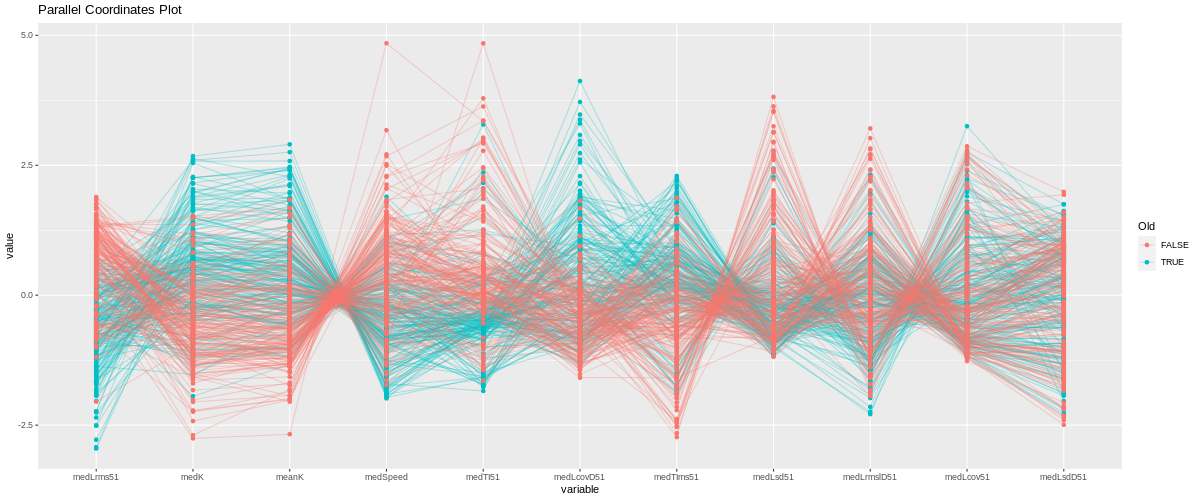

In [19]:
%%R -w 1200 -h 500 -u px
# Out of the box solution from GGally
p

### Fundamentals
- For this case, we have three visual variables
- `position`
    - x axis: 11 categorical variables
    - y axis: continuous value
- `color`: categorical variable (True, False)
- `shape`: points and lines

How parallel coordinates are build?

- Each categorical variable represents a vertical axis
- For each row, a polyline is drawn across each categorical variable
- Polylines are colored based on a variable (categorical or continuous)

### Parallel coordiantes plot can be built using basic line plots
So, we have more 'control' over the plots

Looking at the required format for line plots

https://plotly.com/python/line-charts/

We can see the following

In [20]:
px.data.gapminder().head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

- Long format
- Each polyline is grouped by `country`

### Structure of the current tables

In [21]:
# We need an index for each row
longTable.head()

iSubj  trial  Age  Decade     myVars     value   normVal   Old
0      1      1   76       7  medLrms51  0.189493 -0.406276  True
1      1      2   76       7  medLrms51  0.204152 -0.168225  True
2      1      3   76       7  medLrms51  0.217347  0.046049  True
3      1      4   76       7  medLrms51  0.169569 -0.729817  True
4      1      5   76       7  medLrms51  0.170786 -0.710069  True

In [22]:
wideTable.head()

myVars  iSubj  trial  Age  Decade   Old     meanK      medK  medLcov51  \
0           1      1   76       7  True  0.024586 -0.053610  -0.178508   
1           1      2   76       7  True -0.226344  0.228271  -0.544866   
2           1      3   76       7  True -1.055870 -1.352643   1.353981   
3           1      4   76       7  True -0.748506 -0.886268   1.700509   
4           1      5   76       7  True -0.560256 -1.254999   1.347267   

myVars  medLcovD51  medLrms51  medLrmslD51  medLsd51  medLsdD51  medSpeed  \
0         0.332978  -0.406276     0.045147 -0.194534   0.614619 -0.206204   
1        -0.389216  -0.168225     0.054335 -0.465559  -0.174366  0.155747   
2         0.215643   0.046049    -0.998491  1.551026   0.779784  0.962942   
3         0.202514  -0.729817    -1.645271  1.006211  -0.081213  1.035904   
4         0.358471  -0.710069    -1.297759  0.861507   0.292489  0.565108   

myVars   medTI51  medTIms51  old  
0      -1.179195   0.095150  1.0  
1      -0.344193  -0.062731  1.0  
2       0.343531  -1.409570  1.0  
3       2.160290  -1.897633  1.0  
4       0.216632  -1.214724  1.0

Which table should we use to create the index?

### Creating an index per row

In [23]:
# It is easier to create the index in the wide table and then transform it to long table than
# creating the index in the long table
# Creating an index
wideTable['idrow'] = wideTable.reset_index().index
# Dropping unnecessary columns
wideTable= wideTable.drop(['old'],axis=1)
wideTable.head()


myVars  iSubj  trial  Age  Decade   Old     meanK      medK  medLcov51  \
0           1      1   76       7  True  0.024586 -0.053610  -0.178508   
1           1      2   76       7  True -0.226344  0.228271  -0.544866   
2           1      3   76       7  True -1.055870 -1.352643   1.353981   
3           1      4   76       7  True -0.748506 -0.886268   1.700509   
4           1      5   76       7  True -0.560256 -1.254999   1.347267   

myVars  medLcovD51  medLrms51  medLrmslD51  medLsd51  medLsdD51  medSpeed  \
0         0.332978  -0.406276     0.045147 -0.194534   0.614619 -0.206204   
1        -0.389216  -0.168225     0.054335 -0.465559  -0.174366  0.155747   
2         0.215643   0.046049    -0.998491  1.551026   0.779784  0.962942   
3         0.202514  -0.729817    -1.645271  1.006211  -0.081213  1.035904   
4         0.358471  -0.710069    -1.297759  0.861507   0.292489  0.565108   

myVars   medTI51  medTIms51  idrow  
0      -1.179195   0.095150      0  
1      -0.344193  -0.062731      1  
2       0.343531  -1.409570      2  
3       2.160290  -1.897633      3  
4       0.216632  -1.214724      4

### Long format

In [24]:
# Creating a new dataframe variable
lTable = pd.melt(wideTable, id_vars=['iSubj','trial','Age',
                                     'Decade','Old','idrow'],
                 var_name='myVars')
lTable.head()

iSubj  trial  Age  Decade   Old  idrow myVars     value
0      1      1   76       7  True      0  meanK  0.024586
1      1      2   76       7  True      1  meanK -0.226344
2      1      3   76       7  True      2  meanK -1.055870
3      1      4   76       7  True      3  meanK -0.748506
4      1      5   76       7  True      4  meanK -0.560256

### Quick solution

In [25]:
fig = px.line(lTable, x="myVars", y="value", color="Old",line_group="idrow",
              hover_name="Age", color_discrete_sequence=["#1b9e77", "#7570b3"])

fig.update_layout(autosize=False,width=800,height=400)
fig.show()
# Adding transparency is not straightforward

### Color and alpha channels in plotly
https://plotly.com/python/line-charts/#line-plot-with-column-encoding-color

https://colorbrewer2.org/

In [26]:
# Defining colors

# wideTable.loc[wideTable['Old'] == True, 'color'] = 'rgba(252,141,89,0.5)'
# wideTable.loc[wideTable['Old'] == False, 'color'] = 'rgba(145,191,219,0.5)'
# color = wideTable['color']

color = wideTable['Old'].apply(lambda x: 'rgba(252,141,89,0.5)' 
                               if x == True else 'rgba(145,191,219,0.5)')
color

0       rgba(252,141,89,0.5)
1       rgba(252,141,89,0.5)
2       rgba(252,141,89,0.5)
3       rgba(252,141,89,0.5)
4       rgba(252,141,89,0.5)
               ...          
395    rgba(145,191,219,0.5)
396    rgba(145,191,219,0.5)
397    rgba(145,191,219,0.5)
398    rgba(145,191,219,0.5)
399    rgba(145,191,219,0.5)
Name: Old, Length: 400, dtype: object

# Creating the plot

In [27]:
import plotly.graph_objects as go
fig = go.Figure()

for i in lTable['idrow'].unique():
    fig.add_trace(go.Scatter(
        x=lTable['myVars'][lTable['idrow']==i],
        y=lTable['value'][lTable['idrow']==i],
        showlegend=False,
        line_color = color[i],
    ))

Still a laborious task to create the plot

# Displaying the plot

In [28]:
fig.update_layout(autosize=False,width=800,height=400)
fig.show()

Customizing the plot can also be [time consuming](https://plotly.com/python/hover-text-and-formatting/)

### What about `ggplot2`

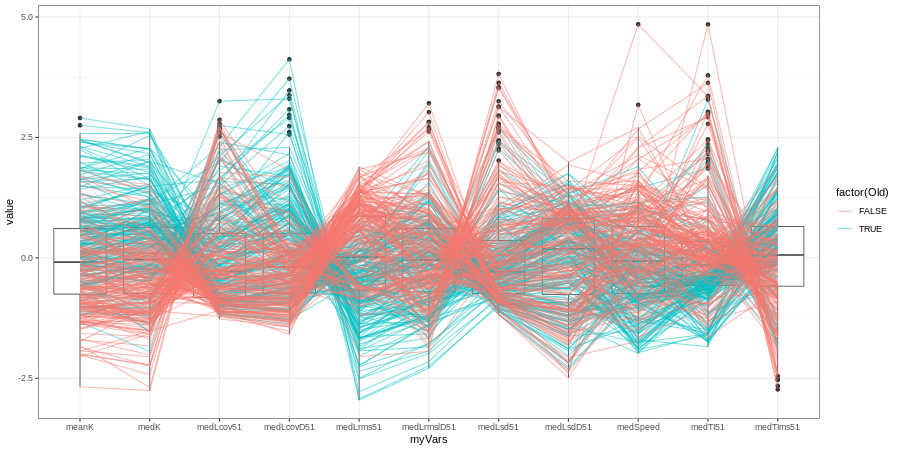

In [29]:
%%R -i lTable -w 900 -h 450 -u px

parPlot <- ggplot(data=lTable,aes(x=myVars,y=value,group=idrow)) +
    geom_boxplot(aes(x=myVars,y=value,group=myVars),size=0.35)+
    geom_line(aes(colour=factor(Old)),alpha=0.5) +
    theme_bw()

parPlot

### Customizing the plot

In [30]:
%%R
curxLabs <- c("medSpeed","medLsd51","medLsdD51","medLrms51","medLrmslD51",
              "medLcov51","medLcovD51","medTI51","medTIms51","medK","meanK")
# LaTex math symbols, like kappa
TeXLabs <- c(paste("$Speed$"),paste("$SD$"),paste("$SD'$"),paste("$RMS$"),
             paste("$RMS'$"),paste("$CoV$"),paste("$CoV'$"),paste("$I$"),
             paste("$I'$"), paste("$\\kappa$"),paste("$\\overline\\kappa$"))

parPlot <- parPlot + 
    # https://ggplot2.tidyverse.org/reference/scale_manual.html
    scale_colour_manual(values=c('#fc8d59','#91bfdb'),
                        name=paste("Age group: "),
                        breaks=c("FALSE","TRUE"),
                        labels=c("Younger (20+)","Older (61+)"))+
    # https://ggplot2.tidyverse.org/reference/scale_discrete.html
    scale_x_discrete(name = "Measures of balance",expand=c(0.02,0.02),
                     breaks = curxLabs,
                     labels = TeXLabs) +
    scale_y_continuous(name = "Normalized measures",expand=c(0.01,0.01),
                       breaks=c(-2:5))+
    # https://ggplot2.tidyverse.org/reference/theme.html
    theme(legend.position="bottom",
          axis.title=element_text(face="bold"), 
          plot.title=element_text(face="bold"))+
    guides(colour = guide_legend(override.aes = list(size=1.5)))

### The plot

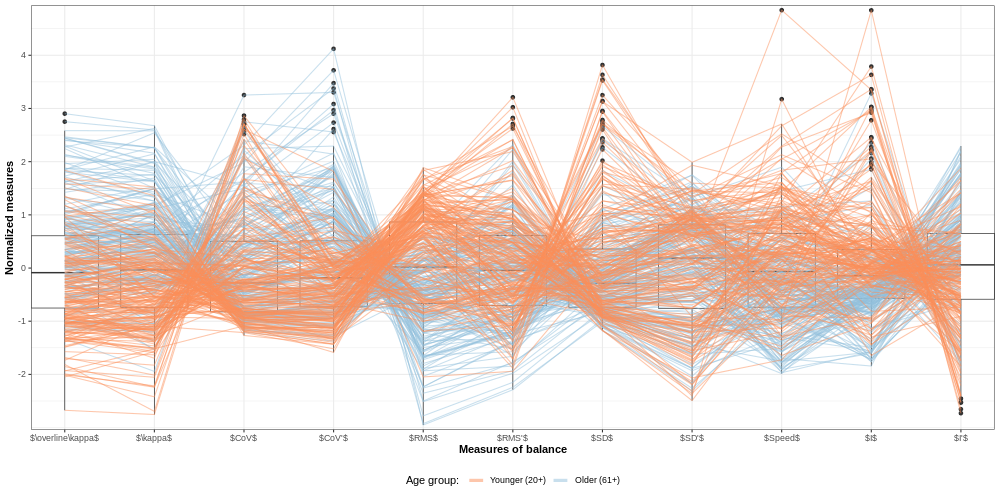

In [31]:
%%R -w 1000 -h 500
parPlot

### Excercise: use tikzdevice to save and convert the plot as pdf

### Making the parallel coordinates plot interactive

In [32]:
%%R -w 1000 -h 500
library(plotly)

fig <- ggplotly(parPlot)

# fig, does not work
# Works in R juoyter notebooks
# See tests/ParCoordsPlotly_R.ipynb

# We need to save as an html widget
#https://www.datisticsblog.com/2018/08/conda3/
htmlwidgets::saveWidget(fig, file='parPlot.html')
# you can use your web browser to open parPlot.html

R[write to console]: 
Attaching package: ‘plotly’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    last_plot


R[write to console]: The following object is masked from ‘package:stats’:

    filter


R[write to console]: The following object is masked from ‘package:graphics’:

    layout




In [33]:
from IPython.display import IFrame

IFrame("./parPlot.html"
      , width = 1000
      , height = 500)

# End